In [3]:
import os
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf

# PYTHONPATH

In [4]:
if "../lib" not in sys.path:
    sys.path.append("../lib")

In [20]:
%load_ext autoreload
%autoreload 2

from util_opencv.image import (
    validate_image,
    get_image,
    resize_image,
    show_image,
    convert_rgb_to_bgr
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Image

In [ ]:
image=get_image(path="./data/udon.jpg")
show_image(image=image, bgr_to_rgb=True)

# How OpenCV handle float

How pixel value is handleds depends on the implementation, hence need to be expicit about the pixel data type.

* [How are floating-point pixel values converted to integer values?](https://stackoverflow.com/questions/59113023/how-are-floating-point-pixel-values-converted-to-integer-values)

> Some libraries assume that floating-point pixel values are between 0 and 1, and will linearly map that range to 0 and 255 when casting to 8-bit unsigned integer. Some others will find the minimum and maximum values and map those to 0 and 255. **You should always explicitly do this conversion** if you want to be sure of what happened to your data.  
> 
> In general, a pixel does not need to be 8-bit unsigned integer. A pixel can have any numerical type. Usually a pixel intensity represents an amount of light, or a density of some sort, but this is not always the case. Any physical quantity can be sampled in 2 or more dimensions. The range of meaningful values thus depends on what is imaged. Negative values are often also meaningful.  
> 
> Many cameras have 8-bit precision when converting light intensity to a digital number. Likewise, displays typically have an b-bit intensity range. This is the reason many image file formats store only 8-bit unsigned integer data. However, some cameras have 12 bits or more, and some processes derive pixel data with a higher precision that one does not want to quantize. Therefore formats such as TIFF and ICS will allow you to save images in just about any numeric format you can think of.

Pixel value as unsigned int between 0-255 is not a rule.

* [OpenCV Forum - Why pixels can have float values? ](https://answers.opencv.org/question/83562/why-pixels-can-have-float-values/)

> Using 255 shades for pixels is only a concept. It was introduced because byte values are easy to store and access, and use little space in memory.
> 
> Sometimes it's too much (binary images) and sometimes this is not enough: professional cameras often use 10-14 bits (1024-4096 shades) to store color information. So the value of white is device-dependent.
>
> To cope with this arbitrary maximum, it's already a good idea to use floating-point values. 0 means black, 1 means white, and 0.1234 is always ~12% grey.


OpenCV handles data type as:

* [How to use `cv2.imshow` correctly for the float image returned by `cv2.distanceTransform`?](https://stackoverflow.com/questions/48331211/how-to-use-cv2-imshow-correctly-for-the-float-image-returned-by-cv2-distancet)

> imshow(winname, mat) may scale the image, depending on its depth:  
> * If the image is **8-bit unsigned**, it is displayed **as is**.
> * If the image is **16-bit unsigned or 32-bit integer**, the pixels are **divided by 256**. That is, the value range [0,255\*256] is mapped to [0,255].
> * If the image is **32-bit or 64-bit floating-point**, the pixel values are **multiplied by 255**. That is, the value range [0,1] is mapped to [0,255].

* [Remember 1 thing, if the RGB values of your image lie in the range of 0-255, make sure the values are not of data type 'float'](https://github.com/llSourcell/Object_Detection_demo_LIVE/issues/8)

> As OpenCV considers float only when values range from 0-1. If it finds a float value larger than 1 it clips off the value thinking floats only exsist between 0-1. Hence such errors generated. So convert the data type to uint8 if values are from 0-255. 

* [Why pixels can have float values?](https://stackoverflow.com/questions/34771281/why-pixels-can-have-float-values)

> BGR images are typically in range 0, 255 for uchar, but in range [0,1] for float. It's just a convention.

Example of float pixel data. Tensorflow uses to float32.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


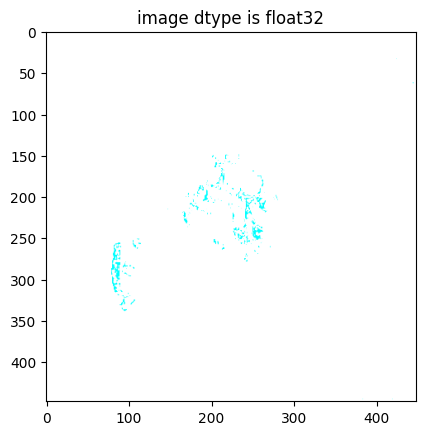

In [25]:
resized = tf.image.resize(images=image, method="bilinear", size=(448, 448), preserve_aspect_ratio=False).numpy()
plt.title(f"image dtype is {resized.dtype}")
plt.imshow(resized)

In [ ]:
Cast to uint8 for OpenCV to show correctly.

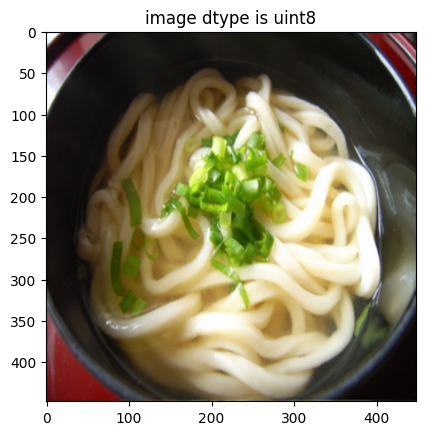

In [21]:
resized_uint8 = tf.cast(resized, dtype=tf.dtypes.uint8).numpy()
plt.title(f"image dtype is {resized_uint8.dtype}")
plt.imshow(convert_rgb_to_bgr(resized_uint8))  # OpenCV assume image in memory as BGR, hence convert to RGB

---
# Validate uint8 for OpenCV

In [24]:
resized = tf.image.resize(images=image, method="bilinear", size=(448, 448), preserve_aspect_ratio=False).numpy()
validate_image(resized)

ValueError: image has float type. Use unsigned int as pixel value